[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_03/blob/master/F03_SCS--BA--Solution_Code_Dimensionality_Reduction_Sprint_Challenge.ipynb)

# *Dimensionality Reduction Sprint Challenge*

*A powerful method for dimensionality reduction is using Principal Components Analysis (PCA).*

*Students should be able to complete objectives after this sprint:*
* *Identify the use case for normalization*
* *Graph the top two dimensions of a high dimensional dataset with PCA*
* *Compute the eigenvectors and eigenvalues of a dataset*

*Lets use the UCI Wine Dataset for this Sprint  Challenge: It is high dimensional, numeric, and clean - an excellent opportunity for PCA.*

*[UCI Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)*

*The UCI License forbids redistributing their data. We can link directly to it!*

*[UCI Wine Data Set Data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/)*

In [2]:
# Download the data to your colab instance!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.data

--2018-05-08 15:36:56--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2018-05-08 15:36:56 (176 MB/s) - ‘wine.data’ saved [10782/10782]



In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wine.data')

# Column names from:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
columns = ['vinyard','alcohol','malic acid','ash','ash alcalinity','magnesium',
           'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
           'Color intensity','Hue','dilute OD280/OD315', 'Proline']

data.columns = columns

vinyard = data['vinyard']
data = data.drop(['vinyard'],axis=1)
colors = np.array(['red','green','blue'])[np.array([vinyard])-1]


# *1. Identify the use case for normalization*

*Principal Components Analysis will give us a view into our data that maximizes its variance, potentially improving intuition and learning algorithms. Look at the below `data.std()` output. If we use PCA to project the wine dataset onto the 3 dimensions with the highest variance, which ones will they be? How will this projection differ than simply plotting the three dimensions directly?*

In [4]:
print(data.std())

alcohol                   0.808808
malic acid                1.119314
ash                       0.275080
ash alcalinity            3.336071
magnesium                14.174018
Total phenols             0.626465
Flavanoids                0.998658
Nonflavanoid phenols      0.124653
Proanthocyanins           0.571545
Color intensity           2.324446
Hue                       0.229135
dilute OD280/OD315        0.705103
Proline                 314.884046
dtype: float64


## Normalization Discussion

PCA chooses bases vectors that maximize variance, so the variables in the data with the greatest variance (and thus greatest standard deviation) will contribute the most to the first few principle components. For this data set, `Proline`, `magnesium`, and `ash alcalinity` have the first, second, and third greatest standard deviations, respectively. `Proline` and `magnesium` each have a variance roughly an order of magnitude larger than the next largest variance, which is pretty wild:  

When we inspect the standard deviation of each variable of a raw data set, it is important to remember that these SDs are given *in the units of the variable*. This is rarely, if ever, a good thing. It makes the SDs difficult to interpret. The SDs of the wine data set (printed above) illustrate this: Inspecting the SDs above, Proline has by far the greatest SD of $SD \approx 314$. This begs the question: 314 of what? 

Such an outlandishly large SD ought to arouse suspicion, but cultivating a general paranoia about unit-dependence isn't a bad idea either, as large SDs aren't necessarily indicative of distortion caused by units, nor small SDs necessarily indicative of the contrary. For a more in-depth discussion, [go here.](https://drive.google.com/file/d/1uW_4m6SKW3HMvMRli-fDY2X8aIgqm0rG/view?usp=sharing)




# *2. Graph the top two dimensions of a high dimensional dataset using PCA*

*Use PCA with 2 components to plot the top two dimensions of this dataset. Apply the color vector above so that the origin of each sample is visible.*

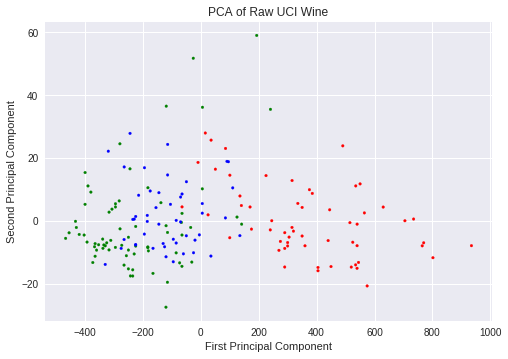

In [5]:
from sklearn.decomposition import PCA

# First, we specify the number of components we want our PCA model to return. 
# In this instance, we're interested in the top 2, so we set n_components = 2.

Model = PCA(n_components=2)

# Next, we need to actually find the principle components. 
# We can do this in two steps, or one step.
# In two steps, we fit the data, then transform it.

Model.fit(data)
data_reduced = Model.transform(data)

# In one step, we use pca's fit_transform method, 
# which is slightly more succinct.

data_reduced = Model.fit_transform(data)

# Obviously, doing both (like I just did) is redundant.
# Feel free to comment out one method or the other to verify that 
# their results are equivalent.

# Now we graph graph our model. 

x, y = data_reduced.T


plt.scatter(x, y, s=7, c=colors[0])


plt.title('PCA of Raw UCI Wine')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

# *3. Graph the top two dimensions of a [standardized] high dimensional dataset using PCA.*

*Use a `normalization` from `scikit.preprocessing` to improve the results of the PCA.*

First of all, apologies for this question. There is some ambiguity around the term "normalize" that warrents clarification. In his submissino, Ray Heberer gives an explanation for "normalization" in different contexts that I thought merits sharing.

From Ray's submission:

>"First, some disambiguation. "Normalization" is a term used in many contexts, with often similar yet distinct meanings. In the context of vectors, it typically means to scale them so that they have unit norm. This is the definition used by [`sklearn.preprocessing.Normalize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). When called on a matrix, it is assumed that the it is of shape `(n_samples, n_features)`, where each sample is a vector. Each row of the matrix is the normalized.

>In the context of probability distributions, mathematicians typically use "normalized" to refer to functions that integrate over their entire domain to one - in other words, they have unit area under the curve.

>A third definition of normalization, one which is most relevant to data science, is treating data as a collection of random variables (1 for each feature), hypothesizing that each is from an independent normal (Gaussian) distribution, and centering each around the mean and giving it unit variance. This is also referred to as "standardization", and is implemented by [`sklearn.preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

>For the purposes of preprocessing before PCA, standardization is the most appropriate. Normalizing by rescaling each sample to have unit norm will coerce the data to occupy a unit hypersphere in the dimension of the number of features. This transformation from a space to a hypersurface in that space discards information. As much as possible, we would like to preprocessing step to preserve information, and only compress during the dimensionality reduction step itself - PCA.

>Using `StandardScalar` will improve the results of PCA because it is not the case that the features of the data are independent, or normal. The principal components will be some linear combination of features, and will leverage the dependence between features of data to find the combination along which the variance is greatest. Furthermore, even if two features of data both came from normal distributions, and one had a larger variance than the other to begin with, rescaling both to one is only harmful if there was a meaningful relationship between the units of one feature and the units of another. This tends to be the exception, rather than the rule (for example, if one column records mass, and another length, and because of the choice of units one column occupies a wider scale than the other, rescaling them both indepently to unit variance is the correct choice)."

Below I use both .StandarScalar and .normalize to illustrate the differences.

**`.normalize`:** 

Here's what happens when we use .normalize. Notice that the graph is similar to the un-normalized one – The  biggest difference is that values have been scaled to well within $(-1,1)$, which supports Ray's claim that this kind of normalizing "will coerce  the data to occupy a unit hypersphere in the dimension of the number of features."

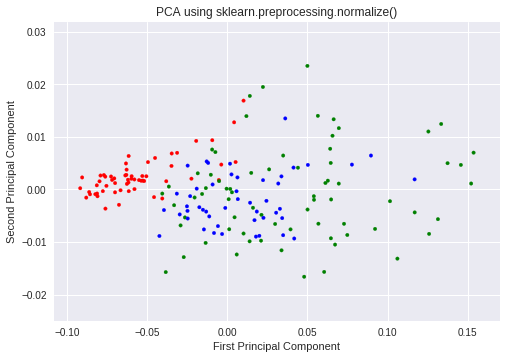

In [21]:
import sklearn.preprocessing as preprocessing

model_norm = PCA(n_components=2)

data_normalized = preprocessing.normalize(data)

model_norm.fit(data_normalized)

data_n = model_norm.transform(data_normalized)


plt.scatter(*data_n.T, s=12, c=colors[0])
plt.title('PCA using sklearn.preprocessing.normalize()')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

**`.StandardScalar`:**  

Contrast the above graph with what we get when we use 
.StandardScalar.

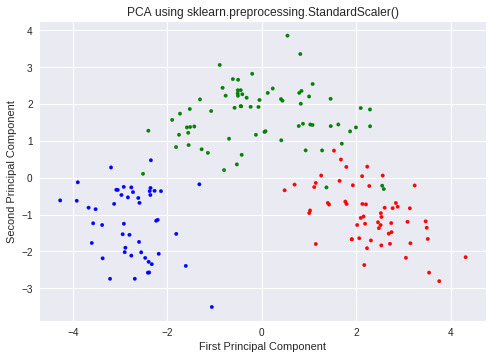

In [11]:
model_stand = PCA(n_components=2)

data_standardized = preprocessing.StandardScaler().fit_transform(data)

model_stand.fit(data_standardized)

data_s = model_stand.transform(data_standardized)


plt.scatter(*data_s.T, s=12, c=colors[0])
plt.title('PCA using sklearn.preprocessing.StandardScaler()')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

As expected, the projected data is much more separable using the .StandardScalar.

# *4. Compute the eigenvectors of a dataset*

*What are the top-two eigenvectors of the above un-normalized dataset?*

In PCA, asking for the top two eigenvectors is synonymous with asking for the first two principle components:

In [22]:
eigenvectors_method_one = Model.components_

print('First eigenvector: {}\n\nSecond eigenvector: {}'.format(eigenvectors_method_one[0], eigenvectors_method_one[1]))

First eigenvector: [ 1.64640308e-03 -6.73503229e-04  1.94877262e-04 -4.62714440e-03
  1.74715429e-02  9.86349949e-04  1.55753482e-03 -1.22303077e-04
  5.91285826e-04  2.33005971e-03  1.70867398e-04  6.85045272e-04
  9.99830206e-01]

Second eigenvector: [ 7.16631916e-04  2.50017789e-03  4.67090151e-03  2.87250643e-02
  9.99280105e-01  7.48473242e-04 -4.49114755e-04 -1.34284344e-03
  4.71110804e-03  1.54838007e-02 -7.97923308e-04 -4.34277343e-03
 -1.73653604e-02]


# *5. Compute the eigenvalues of a dataset*

*What are the top-two eigenvalues of the above un-normalized dataset?*

Likewise, eigenvalues describe the explained variance, which `sklearn.preprocessing` has a method for:

In [25]:
eigenvalues = Model.explained_variance_

print('First eigenvalue: {}\n\nSecond eigenvalue: {}'.format(eigenvalues[0],eigenvalues[1]))

First eigenvalue: 99185.58985563336

Second eigenvalue: 170.86188421366896
